In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cdict = {'red'  :  ((0., 0., 0.), (0.2, 1., 1.), (0.6, 1., 1.), (1., 0., 0.)),
         'green':  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 1., 1.), (1., 1., 1.)),
         'blue' :  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 0., 0.), (1., 0., 0.))}

my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

In [2]:
data = pd.read_csv('crop_data_Newport.csv') #changed .csv here
#Newport data is here: https://drive.google.com/open?id=1hIIFrDH2Y8MRH_95lgRx2iiQxls9G1pf
data.sort_values(by='SAMPLE_DATE', inplace=True, ascending=True) # This now sorts in date order
data.head()

,INDEX,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
2197,391026,18305264,6/1/2018 0:00,33.652605,-117.915722,270,8.0,FLEET51,415090.9354,3724014.657,5/31/2018 17:00
3043,548201,18000706,6/1/2018 0:00,33.617451,-117.888823,16,0.0,FLEET51,417551.6911,3720095.043,5/31/2018 17:00
2119,375149,19793987,6/1/2018 0:00,33.616592,-117.902715,283,62.0,FLEET51,416262.2092,3720011.066,5/31/2018 17:00
3042,548185,17889490,6/1/2018 0:00,33.620126,-117.924678,119,5.0,FLEET51,414228.3068,3720420.838,5/31/2018 17:00
3041,548149,1300985,6/1/2018 0:00,33.631910,-117.914440,0,0.0,FLEET40,415189.5481,3721718.971,5/31/2018 17:00


In [3]:
# data.loc[1:,'LOCAL_TIME'] - 
data.loc[:-1,'LOCAL_TIME']

KeyError: -1

In [12]:
print('unique ID count',len(data.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data.PROBE_ID.unique()))
print('unique time',len(data.LOCAL_TIME.unique()))
print('raw data shape',data.shape)
# - Got 18 unique IDs vs 21 in the other set

unique ID count 18
unique Probe_ID count 1551
unique time 1386
raw data shape (82923, 11)


In [15]:
## I think this is where the Newport data is filtered out, in the original .csv the raw data shape is 40,11 here now it is 0,11
t1_series = data[data.LOCAL_TIME == '2018-06-01 16:49:26 -0700' ]
t1_series.head()
print('raw data shape',t1_series.shape)

# t2_series = data[data.LOCAL_TIME.isin'2018-06-01 16:49:26 -0700' ]
# print('raw data shape',t1_series.shape)

raw data shape (0, 11)


In [7]:
ID_series = data[data.PROBE_ID == '19793987'] #'24046157' ] - I changed to pick a probe ID from the data list, but did not find anything still
ID_series.head()
print('raw data shape',ID_series.shape)

fleet_series = data[data.PROBE_DATA_PROVIDER == 'FLEET51' ]

print('raw data shape',fleet_series.shape)

raw data shape (0, 11)
raw data shape (13445, 11)


# to set specific regions of interest
intersection_center = data[data['edge_id'].isin(intersection_center_edges)]

In [8]:
def pos_heatmap(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.scatter(data['X'].values,
                               data['Y'].values)
    scatter_heat = ax.scatter(data['X'].values,
                               data['Y'].values,
                               c=data['SPEED'], s=45, alpha=0.9,cmap=my_cmap)
    cbar = fig.colorbar(scatter_heat)
    cbar.set_label("Speed (m/s)",fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()   

def route_map(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.plot(data['X'].values,
                               data['Y'].values)
#     scatter_time = ax.plot(data['X'].values,
#                                data['Y'].values,
#                                c=data.iloc[1:,'LOCAL_TIME'] - data.iloc[:-1,'LOCAL_TIME'], s=45, alpha=0.9,cmap=my_cmap)
#     cbar = fig.colorbar(scatter_heat)
#     cbar.set_label("Speed (m/s)",fontsize=20)
#     cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show() 
    
def mean_speed(data,title):
    plt.figure(figsize = (14,10))
    sns.lineplot(x=data['time'],y=data['speed'])
    plt.title(title,fontsize=25)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Mean Speed (m/s)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

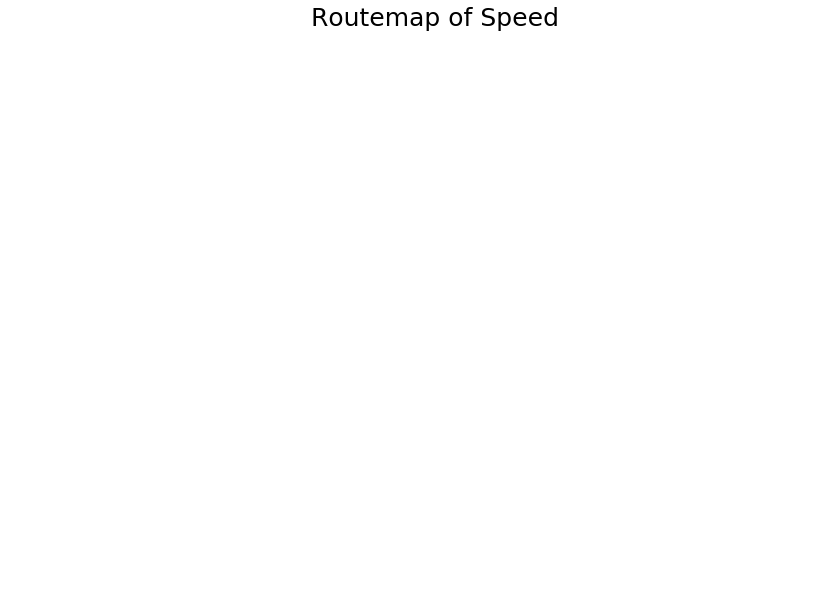

In [9]:
ax = route_map(ID_series,'Routemap of Speed') #Changed to routemap from heatmap

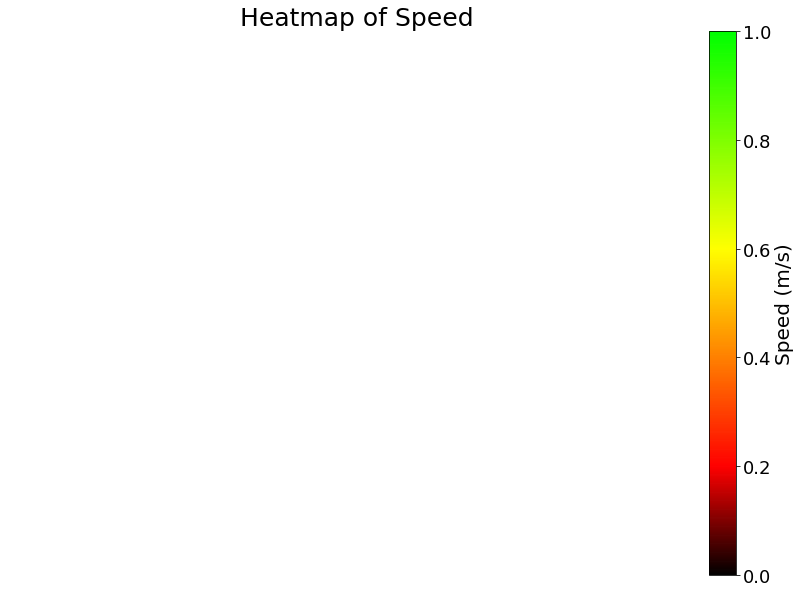

In [10]:
ax = pos_heatmap(ID_series,'Heatmap of Speed')

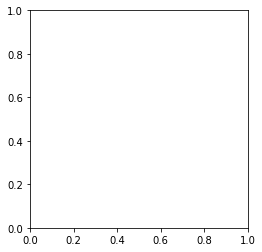

In [11]:
#http://polygons.openstreetmap.fr/get_geojson.py?id=396479&params=0
#https://nominatim.openstreetmap.org/details.php?place_id=198792806
import geopandas as gpd
df_places = gpd.read_file('LA.geojson')
df_places.head()
df_places.plot(ax)

In [ ]:
#simulate the trips (statistical applciation)
#estimate how many people are on the beach